<a href="https://colab.research.google.com/github/RasKemal/Data-Science-Projects/blob/main/Parkinson's_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Gerekli kütüphanelerin yüklenmesi
import csv
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


In [ ]:
#Datayı csv dosyadan pandas dataframe'e yükleme
data = pd.read_csv('/content/parkinsons.csv')

In [ ]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
#Dataset hakkında daha çok bilgi
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# Dataset hakkında istatistiksel veri alma
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Sütunlarda null değer var mı diye kontrol
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Erişilmeyen değerler var mı diye kontrol
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Target değişkeninin(status) dağılımı
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
# Datayı status feature'una göre gruplama
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [ ]:
#name analizimizde gereksiz olduğundan bu feature'ı çıkarıyoruz
data = data.drop(['name'],axis=1)

In [ ]:
# Status ile geri kalan featureları birbirinden ayırma
Features = data.drop(['status'],axis=1)
Target = data['status']
X=Features
y=Target

In [ ]:
# Değerleri scale etme
stdscaler = StandardScaler()
X = np.array(stdscaler.fit_transform(X))
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [ ]:
# Datayı train ve test datalarına ayırma
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
# Naive Bayes Modeli
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Toplam %d nokta içinde yanlış etiketlenen noktaların sayısı : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Toplam 39 nokta içinde yanlış etiketlenen noktaların sayısı : 10


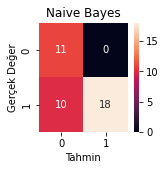

In [ ]:
#Yöntemin confusion matrisi
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
plt.title("Naive Bayes")
fg=sn.heatmap(cm,annot=True)
figure = fg.get_figure()
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
figure.savefig('Naive Bayes.jpg',dpi=400)

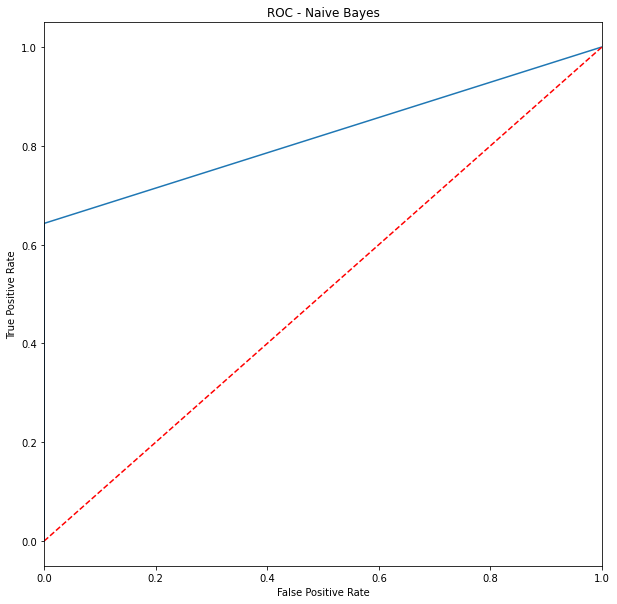

roc_auc_score for Naive Bayes:  0.8214285714285714


In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Naive Bayes')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred))

In [ ]:
# Logistic Regression yöntemi ile modelleme
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
Y_predmod1=log_reg.predict(X_test)
for i,j in enumerate(Y_predmod1):
    if(j<0.5):
        Y_predmod1[i]=0
    else:
        Y_predmod1[i]=1
print(Y_predmod1)
Y_test=np.array(y_test)
print("Logistic Regression Doğruluk :", log_reg.score(X_test,Y_test))

[1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0
 1 0]
Logistic Regression Doğruluk : 0.9743589743589743


In [ ]:
fpr, tpr, thresholds = roc_curve()

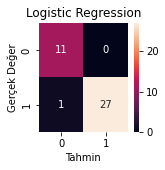

In [ ]:
#Yöntemin confusion matrisi
cm=confusion_matrix(Y_test,Y_predmod1)
plt.figure(figsize=(2,2))
plt.title("Logistic Regression")
fg=sn.heatmap(cm,annot=True)
figure = fg.get_figure()
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
figure.savefig('Logistic Regression.jpg',dpi=400)

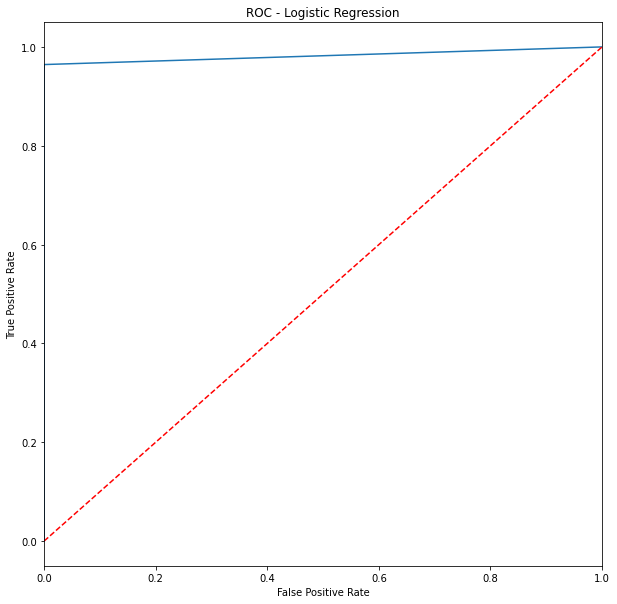

roc_auc_score for Logistic Regression:  0.9821428571428572


In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, Y_predmod1)
plt.subplots(1, figsize=(10,10))
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, Y_predmod1))

In [ ]:
# Decision Tree yöntemi ile modelleme
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,y_train)
Y_predmod3=dtree.predict(X_test)
print("\nDecision Tree Doğruluk:",dtree.score(X_test,y_test))


Decision Tree Doğruluk: 0.9230769230769231


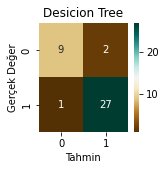

In [ ]:
#Yöntemin confusion matrisi
cm=confusion_matrix(Y_test,Y_predmod3)
plt.figure(figsize=(2,2))
plt.title("Desicion Tree")
fg=sn.heatmap(cm,annot=True,cmap='BrBG')
figure = fg.get_figure()
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
figure.savefig('Desicion Tree.jpg',dpi=400)

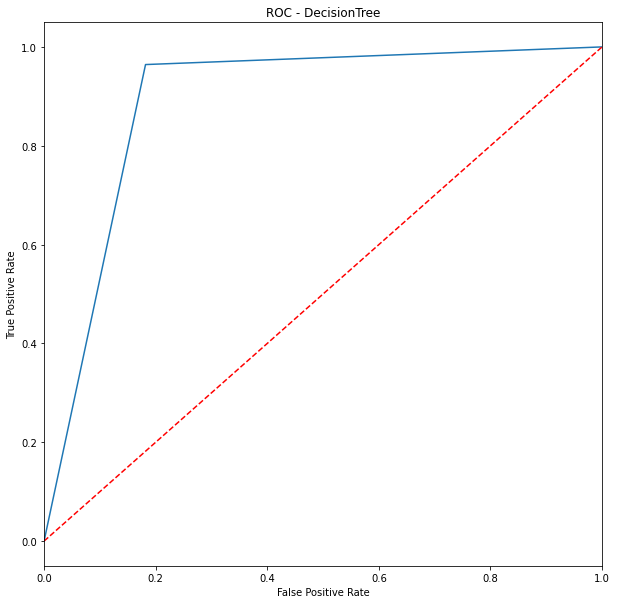

roc_auc_score for Decision Tree:  0.8912337662337663


In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, Y_predmod3)
plt.subplots(1, figsize=(10,10))
plt.title('ROC - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('roc_auc_score for Decision Tree: ', roc_auc_score(Y_test, Y_predmod3))

In [ ]:
# K-Nearest Neighbor yöntemi ile modelleme
neigh = KNeighborsClassifier()
neigh.fit(X, y)
Y_predmod4 = neigh.predict(X_test)
print("\nK-neighbor Doğruluk:",neigh.score(X_test,y_test))


K-neighbor Doğruluk: 0.9743589743589743


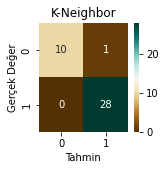

In [ ]:
cm=confusion_matrix(Y_test,Y_predmod4)
plt.figure(figsize=(2,2))
plt.title("K-Neighbor")
fg=sn.heatmap(cm,annot=True,cmap='BrBG')
figure = fg.get_figure()
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
figure.savefig('K-Neighbor.jpg',dpi=400)